In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [61]:
#Read the data
data=pd.read_csv("C:\\Users\\Madhusmita Panda\\Downloads\\blr_real_estate_prices.csv")
data = data.drop('availability', axis=1)
data = data.drop('bath', axis=1)
data               # here the dataset and it's paths are shows.
                   # delete a column (availability) using drop .

,area_type,location,size,society,total_sqft,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,NaN,1440,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,NaN,1200,1.0,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,ArsiaEx,3453,0.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,NaN,3600,NaN,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,1.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,SollyCl,4689,1.0,488.00


In [62]:
# Create a label encoder object
le = LabelEncoder()                 ##LabelEncoder is used to encode the categorical column area_type into numerical values. 
# Convert a categorical column to numeric
data['area_type'] = le.fit_transform(data['area_type'])                                                              
data

#area_type is converted categorical to numeric using labelencoder and fit_transform(fit the data into a model and transform it into a form)

#bhk to numerical value
data['bhk'] = data['size'].apply(lambda x: int(x.split(' ')[0])if isinstance(x, str) and ' ' in x else None)
data        

,area_type,location,size,society,total_sqft,balcony,price,bhk
0,3,Electronic City Phase II,2 BHK,Coomee,1056,1.0,39.07,2.0
1,2,Chikka Tirupathi,4 Bedroom,Theanmp,2600,3.0,120.00,4.0
2,0,Uttarahalli,3 BHK,NaN,1440,3.0,62.00,3.0
3,3,Lingadheeranahalli,3 BHK,Soiewre,1521,1.0,95.00,3.0
4,3,Kothanur,2 BHK,NaN,1200,1.0,51.00,2.0
...,...,...,...,...,...,...,...,...
13315,0,Whitefield,5 Bedroom,ArsiaEx,3453,0.0,231.00,5.0
13316,3,Richards Town,4 BHK,NaN,3600,NaN,400.00,4.0
13317,0,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,1.0,60.00,2.0
13318,3,Padmanabhanagar,4 BHK,SollyCl,4689,1.0,488.00,4.0


In [5]:
data.total_sqft.unique() # here the unique() is used to find the unique numbers in a data set not duplicate values.

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [63]:
def is_float(x):       #is_float function: Checks if a value can be converted to a float.
    try:
        float(x)
    except:
        return False
    return True

In [64]:
data[~data['total_sqft'].apply(is_float)]
data

,area_type,location,size,society,total_sqft,balcony,price,bhk
0,3,Electronic City Phase II,2 BHK,Coomee,1056,1.0,39.07,2.0
1,2,Chikka Tirupathi,4 Bedroom,Theanmp,2600,3.0,120.00,4.0
2,0,Uttarahalli,3 BHK,NaN,1440,3.0,62.00,3.0
3,3,Lingadheeranahalli,3 BHK,Soiewre,1521,1.0,95.00,3.0
4,3,Kothanur,2 BHK,NaN,1200,1.0,51.00,2.0
...,...,...,...,...,...,...,...,...
13315,0,Whitefield,5 Bedroom,ArsiaEx,3453,0.0,231.00,5.0
13316,3,Richards Town,4 BHK,NaN,3600,NaN,400.00,4.0
13317,0,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,1.0,60.00,2.0
13318,3,Padmanabhanagar,4 BHK,SollyCl,4689,1.0,488.00,4.0


In [65]:
#converting the range in total_sqft to a mean value
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [66]:
data= data.copy()
data['total_sqft'] = data['total_sqft'].apply(convert_sqft_to_num)
data

,area_type,location,size,society,total_sqft,balcony,price,bhk
0,3,Electronic City Phase II,2 BHK,Coomee,1056.0,1.0,39.07,2.0
1,2,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,3.0,120.00,4.0
2,0,Uttarahalli,3 BHK,NaN,1440.0,3.0,62.00,3.0
3,3,Lingadheeranahalli,3 BHK,Soiewre,1521.0,1.0,95.00,3.0
4,3,Kothanur,2 BHK,NaN,1200.0,1.0,51.00,2.0
...,...,...,...,...,...,...,...,...
13315,0,Whitefield,5 Bedroom,ArsiaEx,3453.0,0.0,231.00,5.0
13316,3,Richards Town,4 BHK,NaN,3600.0,NaN,400.00,4.0
13317,0,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,1.0,60.00,2.0
13318,3,Padmanabhanagar,4 BHK,SollyCl,4689.0,1.0,488.00,4.0


In [67]:
#information about the dataset
print("\n Information about the dataset")
data.info()


 Information about the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13320 non-null  int32  
 1   location    13319 non-null  object 
 2   size        13304 non-null  object 
 3   society     7818 non-null   object 
 4   total_sqft  13274 non-null  float64
 5   balcony     12711 non-null  float64
 6   price       13320 non-null  float64
 7   bhk         13304 non-null  float64
dtypes: float64(4), int32(1), object(3)
memory usage: 780.6+ KB


In [68]:
# display missing value
missing_values=data.isnull().sum()
print("\nMissing values:")
print(missing_values)


Missing values:
area_type        0
location         1
size            16
society       5502
total_sqft      46
balcony        609
price            0
bhk             16
dtype: int64


In [69]:
# For categorical columns, you can replace missing values with mode
data['location'].fillna(data['location'].mode()[0], inplace=True)
data['size'].fillna(data['size'].mode()[0], inplace=True)
data['society'].fillna(data['society'].mode()[0], inplace=True)
data['total_sqft'].fillna(data['total_sqft'].mode()[0], inplace=True)
data['balcony'].fillna(data['balcony'].mode()[0], inplace=True)
data['bhk'].fillna(data['bhk'].mode()[0], inplace=True)

In [ ]:
#to fill missing values in categorical columns with the most frequent values that's why use mode()[0].

In [70]:
print("after replacing missing value with zero")
# Display missing values

missing_values=data.isnull().sum(0)    
print("\nMissing_values:")
missing_values

after replacing missing value with zero

Missing_values:


area_type     0
location      0
size          0
society       0
total_sqft    0
balcony       0
price         0
bhk           0
dtype: int64

In [72]:
#check for duplicate data
duplicate_rows=data[data.duplicated()]
print("\n Duplicate rows")
duplicate_rows


 Duplicate rows


,area_type,location,size,society,total_sqft,balcony,price,bhk
242,3,Chandapura,1 BHK,SunceEs,645.0,1.0,16.45,1.0
887,3,Chandapura,2 BHK,SunceEs,1015.0,2.0,25.88,2.0
905,3,Kanakpura Road,1 BHK,PrarePa,525.0,1.0,26.00,1.0
971,3,Haralur Road,3 BHK,NRowse,1464.0,2.0,56.00,3.0
1051,2,TC Palaya,3 Bedroom,GrrvaGr,1200.0,0.0,66.00,3.0
...,...,...,...,...,...,...,...,...
13285,3,VHBCS Layout,2 BHK,OlarkLa,1353.0,2.0,110.00,2.0
13299,3,Whitefield,4 BHK,Prtates,2856.0,0.0,154.50,4.0
13311,2,Ramamurthy Nagar,7 Bedroom,GrrvaGr,1500.0,2.0,250.00,7.0
13313,3,Uttarahalli,3 BHK,Aklia R,1345.0,1.0,57.00,3.0


In [73]:
# Count the number of unique items in each specified column
unique_counts = data[columns_of_interest].nunique()

# Print the results
print(unique_counts)

area_type        4
total_sqft    1999
balcony          4
price         1994
bhk             19
dtype: int64


In [74]:
# Initialize a dictionary to store the results
df = data
results = {}

# Count the number of unique items and the frequency of each unique item
for column in columns_of_interest:
    unique_count = df[column].nunique()
    frequency_count = df[column].value_counts()
    results[column] = {
        'unique_count': unique_count,
        'frequency_count': frequency_count
    }

# Print the results
for column, result in results.items():
    print(f"Column: {column}")
    print(f"Number of unique items: {result['unique_count']}")
    print("Frequency of each unique item:")
    print(result['frequency_count'])
    print("\n")

Column: area_type
Number of unique items: 4
Frequency of each unique item:
area_type
3    8790
0    2418
2    2025
1      87
Name: count, dtype: int64


Column: total_sqft
Number of unique items: 1999
Frequency of each unique item:
total_sqft
1200.0    889
1100.0    221
1500.0    206
2400.0    196
600.0     180
         ... 
3080.0      1
787.0       1
6613.0      1
502.0       1
4689.0      1
Name: count, Length: 1999, dtype: int64


Column: balcony
Number of unique items: 4
Frequency of each unique item:
balcony
2.0    5722
1.0    4897
3.0    1672
0.0    1029
Name: count, dtype: int64


Column: price
Number of unique items: 1994
Frequency of each unique item:
price
75.00     310
65.00     302
55.00     275
60.00     270
45.00     240
         ... 
351.00      1
54.10       1
80.64       1
32.73       1
488.00      1
Name: count, Length: 1994, dtype: int64


Column: bhk
Number of unique items: 19
Frequency of each unique item:
bhk
2.0     5544
3.0     4857
4.0     1417
1.0      656
5.

In [75]:
# Find out meaningful columns: Analyze correlation
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
correlation_matrix = data[numeric_columns].corr()
print(correlation_matrix)

relevant_columns = correlation_matrix['price'].sort_values(ascending=False).index
print("Most meaningful columns:")
relevant_columns

            total_sqft   balcony     price       bhk
total_sqft    1.000000  0.154543  0.574643  0.345788
balcony       0.154543  1.000000  0.124951  0.194358
price         0.574643  0.124951  1.000000  0.398074
bhk           0.345788  0.194358  0.398074  1.000000
Most meaningful columns:


Index(['price', 'total_sqft', 'bhk', 'balcony'], dtype='object')

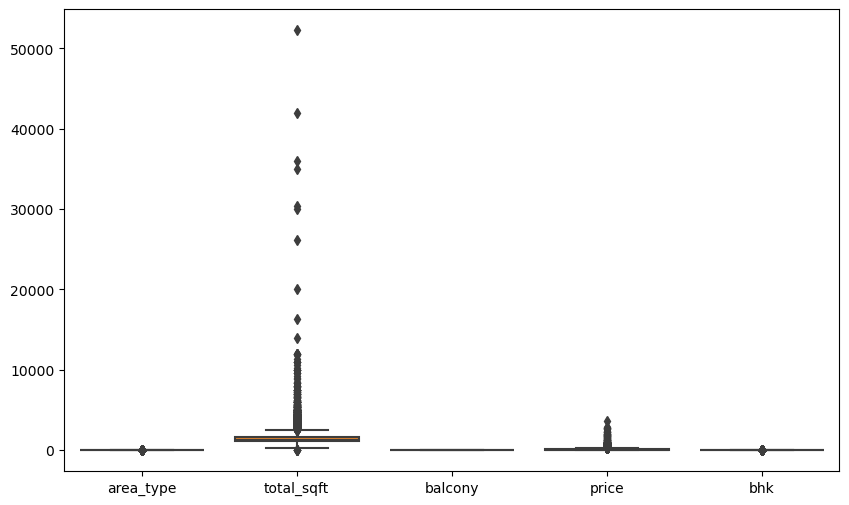

In [76]:
# Check outlier patterns: Visualize datalt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.show()

#Uses a boxplot to visualize outliers in the 'bhk' column. the individual points outside the whiskers are the outliers.
#these are the bhks that are high or low compared to the rest of the dataset.

In [77]:
#identify outliers using the IQR method
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
data=data[numeric_columns]
q1=data.quantile(0.25)
q2=data.quantile(0.75)
IQR=q2-q1
outliers=((data<(q1-1.5*IQR))|(data>(q2+1.5*IQR))).sum()
print("Number of outliers in each column:")
print(outliers)

data_filtered=data[~((data<(q1-1.5*IQR))|(data>(q2+1.5*IQR))).any(axis=1)]
data_filtered

Number of outliers in each column:
total_sqft    1172
balcony          0
price         1276
bhk            846
dtype: int64


,total_sqft,balcony,price,bhk
0,1056.0,1.0,39.07,2.0
2,1440.0,3.0,62.00,3.0
3,1521.0,1.0,95.00,3.0
4,1200.0,1.0,51.00,2.0
5,1170.0,1.0,38.00,2.0
...,...,...,...,...
13312,1262.0,2.0,47.00,2.0
13313,1345.0,1.0,57.00,3.0
13314,1715.0,3.0,112.00,3.0
13317,1141.0,1.0,60.00,2.0


C:\Users\Madhusmita Panda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Madhusmita Panda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Madhusmita Panda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Madhusmita Panda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

<Figure size 600x200 with 0 Axes>

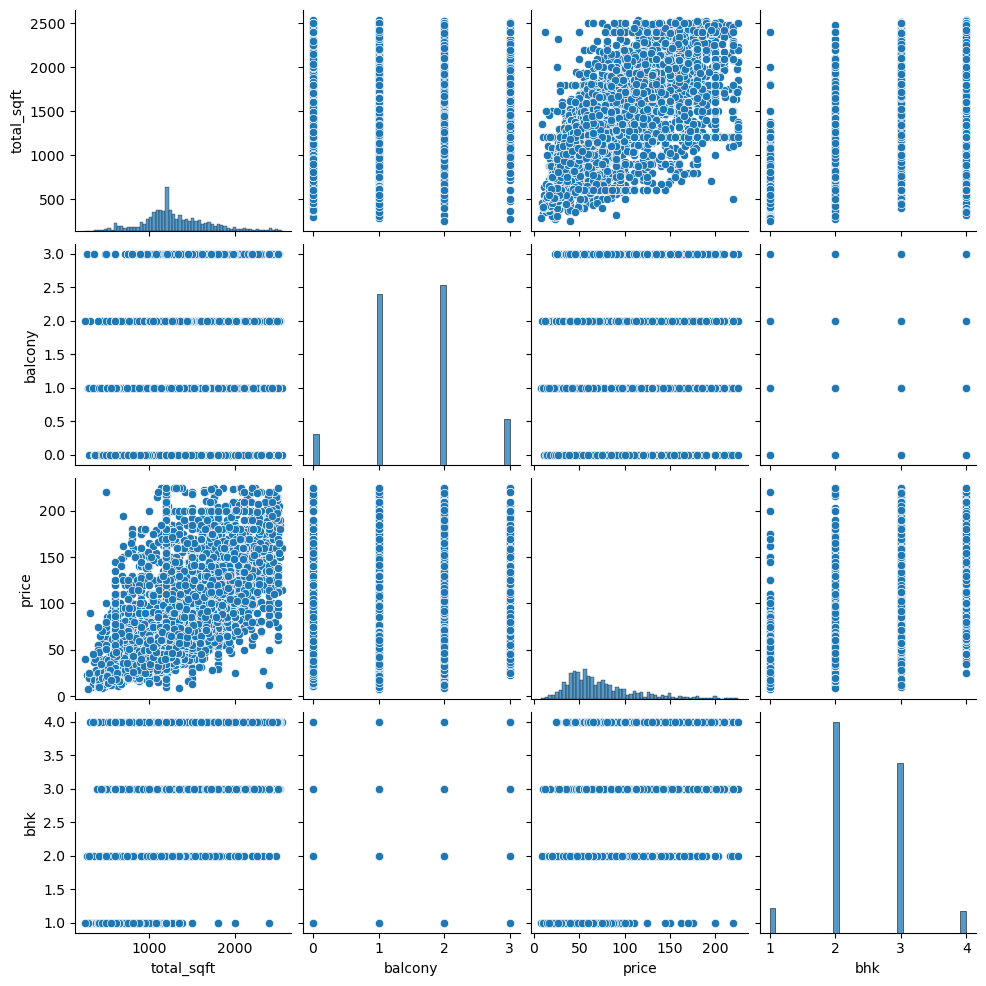

In [78]:
# Identify meaningful patterns: Explore relationship
plt.figure(figsize=(6,2))
sns.pairplot(data_filtered)  
plt.show()


In [79]:
print("\nStatical measures:")
data.describe()             # here describe all the numeric columns count,mean,std,min,max and percentages(25%,50%,75%).


Statical measures:


,total_sqft,balcony,price,bhk
count,13320.000000,13320.000000,13320.000000,13320.000000
mean,1558.384740,1.603378,112.565627,2.802778
std,1236.444878,0.803067,148.971674,1.294496
min,1.000000,0.000000,8.000000,1.000000
25%,1100.000000,1.000000,50.000000,2.000000
50%,1275.000000,2.000000,72.000000,3.000000
75%,1678.000000,2.000000,120.000000,3.000000
max,52272.000000,3.000000,3600.000000,43.000000


['total_sqft', 'balcony', 'price', 'bhk']


C:\Users\Madhusmita Panda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


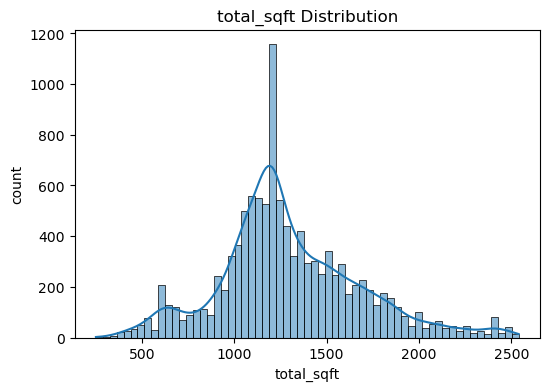

C:\Users\Madhusmita Panda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


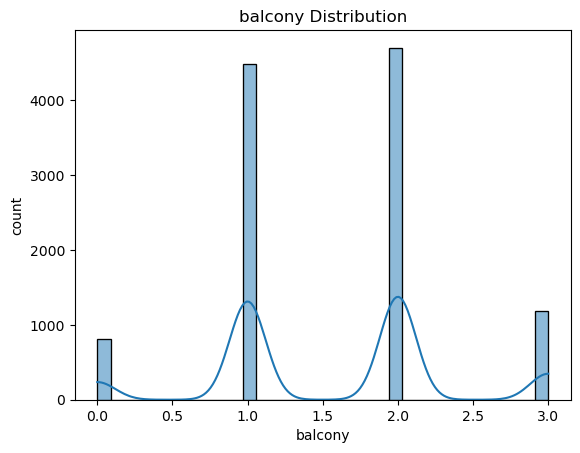

C:\Users\Madhusmita Panda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


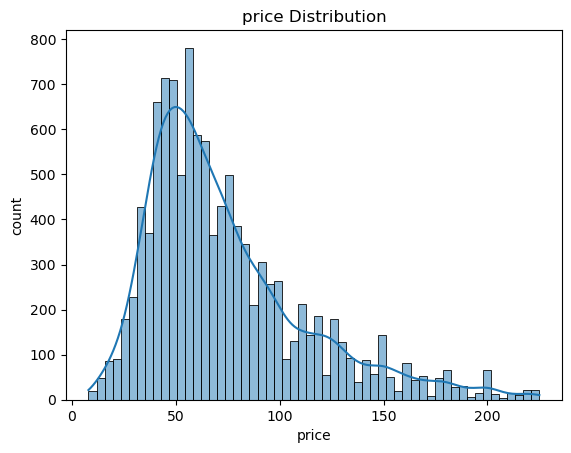

C:\Users\Madhusmita Panda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


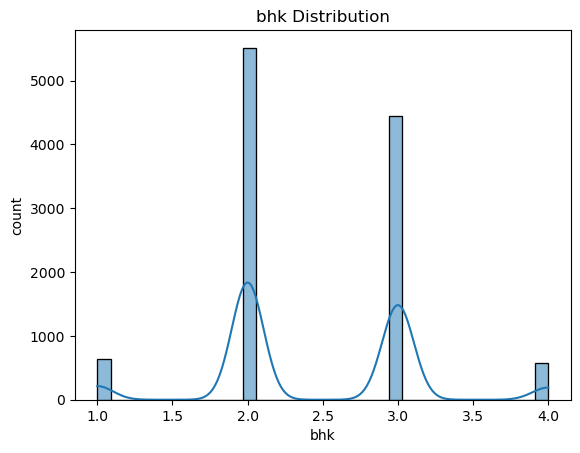

In [80]:
#numerical analysis
numeric_columns = data_filtered.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(numeric_columns)

plt.figure(figsize=(6, 4))
for column in numeric_columns:
    sns.histplot(data_filtered[column], kde=True,stat='count')
    plt.title(f"{column} Distribution")
    plt.xlabel(column)
    plt.ylabel("count")
    plt.show()

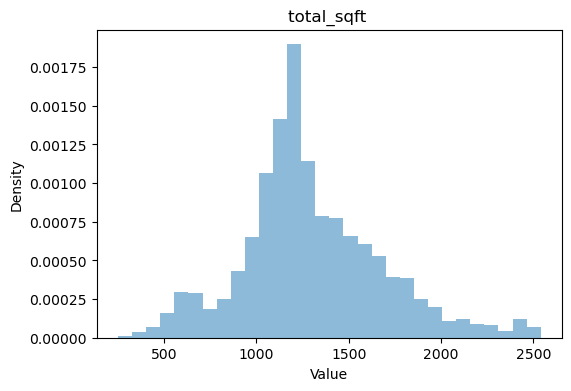

In [81]:
# Define the columns you want to compare
column1 = 'total_sqft'

# Plot histograms
plt.figure(figsize=(6,4))

# Plot the first column
plt.hist(data_filtered[column1], bins=30, alpha=0.5, label=column1, density=True)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('total_sqft ')

# Show the plot
plt.show()


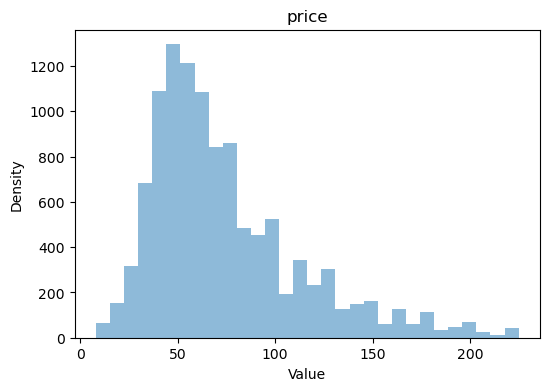

In [82]:
# Define the columns you want to compare
column1= 'price'

# Plot histograms
plt.figure(figsize=(6,4))

# Plot the first column
plt.hist(data_filtered[column1], bins=30, alpha=0.5, label=column1, density=False)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('price')

# Show the plot
plt.show()


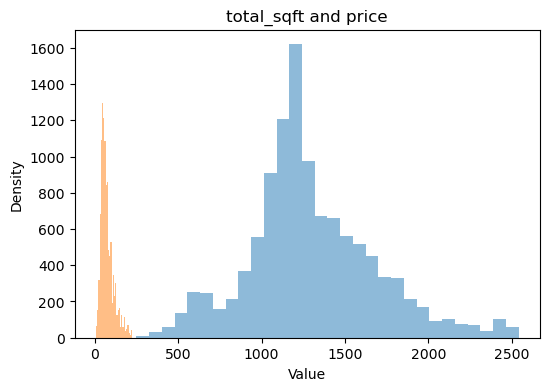

In [83]:
# Define the columns you want to compare
column1 = 'total_sqft'
column2 = 'price'

# Plot histograms
plt.figure(figsize=(6,4))

# Plot the first column
plt.hist(data_filtered[column1], bins=30, alpha=0.5, label=column1, density=False)

# Plot the second column
plt.hist(data_filtered[column2], bins=30, alpha=0.5, label=column2, density=False)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('total_sqft and price')

# Show the plot
plt.show()


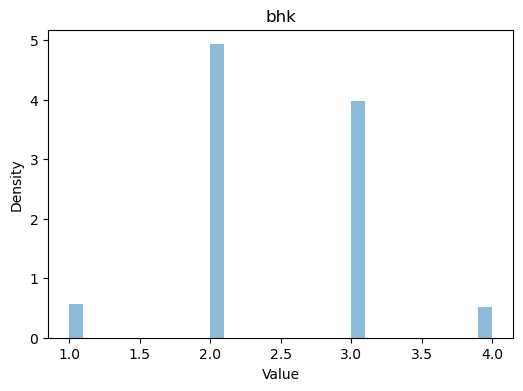

In [84]:
# Define the columns you want to compare
column1= 'bhk'

# Plot histograms
plt.figure(figsize=(6,4))

# Plot the first column
plt.hist(data_filtered[column1], bins=30, alpha=0.5, label=column1, density=True)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('bhk')

# Show the plot
plt.show()


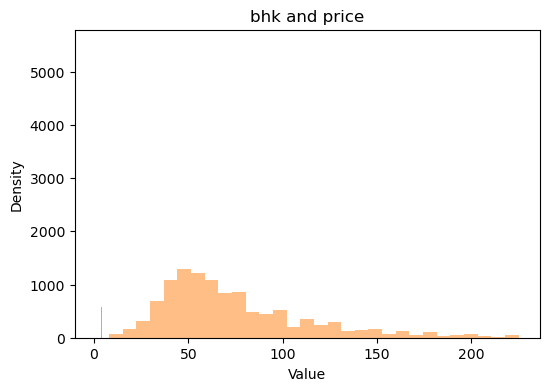

In [85]:
# Define the columns you want to compare
column1 = 'bhk'
column2 = 'price'

# Plot histograms
plt.figure(figsize=(6,4))

# Plot the first column
plt.hist(data_filtered[column1], bins=30, alpha=0.5, label=column1, density=False)

# Plot the second column
plt.hist(data_filtered[column2], bins=30, alpha=0.5, label=column2, density=False)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('bhk and price')

# Show the plot
plt.show()


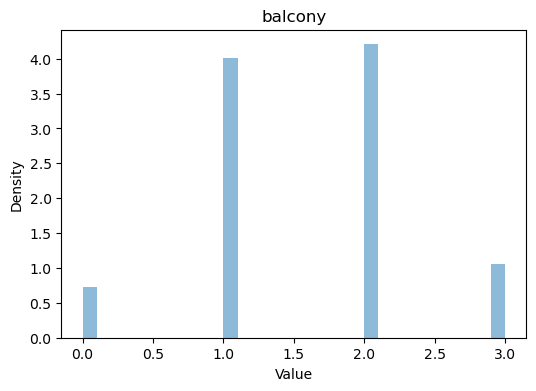

In [86]:
# Define the columns you want to compare
column1= 'balcony'

# Plot histograms
plt.figure(figsize=(6,4))

# Plot the first column
plt.hist(data_filtered[column1], bins=30, alpha=0.5, label=column1, density=True)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('balcony')

# Show the plot
plt.show()


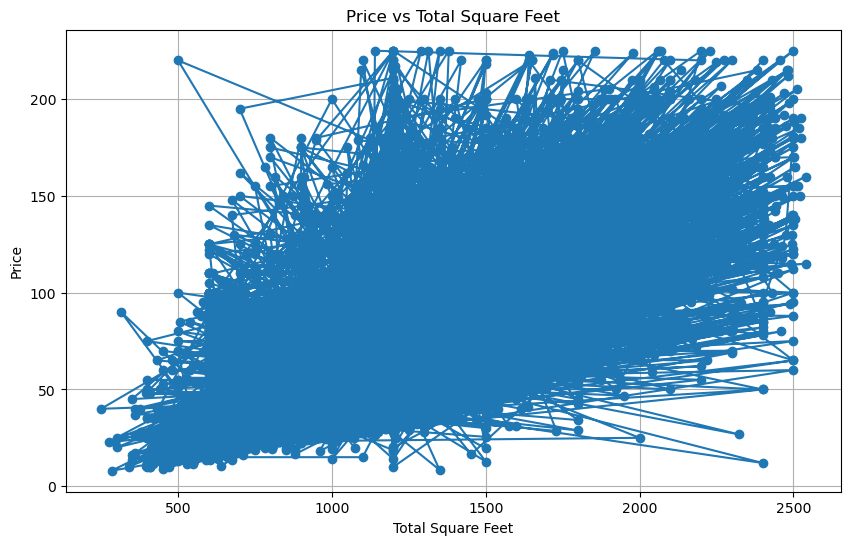

In [87]:
plt.figure(figsize=(10, 6))
plt.plot(data_filtered['total_sqft'], data_filtered['price'], linestyle='-', marker='o')
plt.xlabel('Total Square Feet')
plt.ylabel('Price')
plt.title('Price vs Total Square Feet')
plt.grid(True)
plt.show()


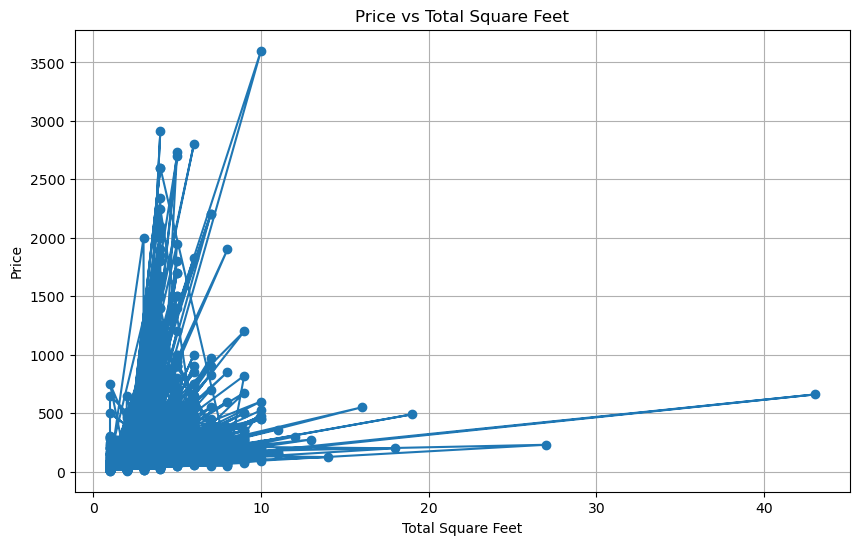

In [88]:
plt.figure(figsize=(10, 6))
plt.plot(data['bhk'], data['price'], linestyle='-', marker='o')
plt.xlabel('Total Square Feet')
plt.ylabel('Price')
plt.title('Price vs Total Square Feet')
plt.grid(True)
plt.show()
